## discription

It is a 2013 sales data of Bigmart from 10 different cities for 1559 products. It has total of 12 attributes and some of the data is also missing. Our aim is to build a predictive model to find out sales of each item from different outlets. 

### procedure:
    1. data analysis
    2. feature engineering
    3. feature selection
    4. regression model 

### data analysis

In [1]:
#importing required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
%matplotlib inline
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
#loading data
train= pd.read_csv('train_bigmart.csv')

In [3]:

train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#checking shape of data
train.shape


(8523, 12)

In [5]:
#outlet age will be a better indicator than establishment year
train['Outlet_Age']= 2020-train['Outlet_Establishment_Year']


In [6]:
train=train.drop(columns=['Outlet_Establishment_Year'],axis=1)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,33


In [7]:
#correlation matrix 
corr_train= train.corr()
corr_train

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age
Item_Weight,1.000000,-0.014048,0.027141,0.014123,0.011588
Item_Visibility,-0.014048,1.000000,-0.001315,-0.128625,0.074834
Item_MRP,0.027141,-0.001315,1.000000,0.567574,-0.005020
Item_Outlet_Sales,0.014123,-0.128625,0.567574,1.000000,0.049135
Outlet_Age,0.011588,0.074834,-0.005020,0.049135,1.000000


##### From the above correlation matrix, correlation between item weight and target variable is insignificant hence it can be dropped.

In [8]:
#dropping the item weight column
train= train.drop(['Item_Weight'],axis=1)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
Item_Identifier         8523 non-null object
Item_Fat_Content        8523 non-null object
Item_Visibility         8523 non-null float64
Item_Type               8523 non-null object
Item_MRP                8523 non-null float64
Outlet_Identifier       8523 non-null object
Outlet_Size             6113 non-null object
Outlet_Location_Type    8523 non-null object
Outlet_Type             8523 non-null object
Item_Outlet_Sales       8523 non-null float64
Outlet_Age              8523 non-null int64
dtypes: float64(3), int64(1), object(7)
memory usage: 732.6+ KB


Null values will be dealt with in the feature engineering section

In [10]:
train.describe()

,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,2181.288914,22.168133
std,0.051598,62.275067,1706.499616,8.371760
min,0.000000,31.290000,33.290000,11.000000
25%,0.026989,93.826500,834.247400,16.000000
50%,0.053931,143.012800,1794.331000,21.000000
75%,0.094585,185.643700,3101.296400,33.000000
max,0.328391,266.888400,13086.964800,35.000000


In [11]:
#checking missing values
for feature in train.columns:
    print('the missing value for {} is {}%'.format(feature,train[feature].isnull().sum()/len(train)*100) )


the missing value for Item_Identifier is 0.0%
the missing value for Item_Fat_Content is 0.0%
the missing value for Item_Visibility is 0.0%
the missing value for Item_Type is 0.0%
the missing value for Item_MRP is 0.0%
the missing value for Outlet_Identifier is 0.0%
the missing value for Outlet_Size is 28.27642848762173%
the missing value for Outlet_Location_Type is 0.0%
the missing value for Outlet_Type is 0.0%
the missing value for Item_Outlet_Sales is 0.0%
the missing value for Outlet_Age is 0.0%


In [12]:
train.nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Visibility         7880
Item_Type                 16
Item_MRP                5938
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
Item_Outlet_Sales       3493
Outlet_Age                 9
dtype: int64

In [13]:
#creating a list of features with discrete variables
disc_feature= [features for features in train.columns if train[features].nunique()<20]

In [14]:

disc_feature

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Outlet_Age']

In [15]:
for feature in disc_feature:
    print(feature)
    print(train[feature].unique())

Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size
['Medium' nan 'High' 'Small']
Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
Outlet_Age
[21 11 22 33 35 18 13 23 16]


In [16]:
train[disc_feature].head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,21
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,11
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,21
3,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store,22
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,33


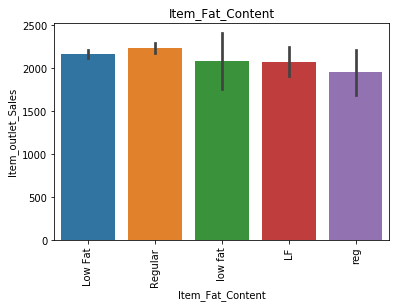

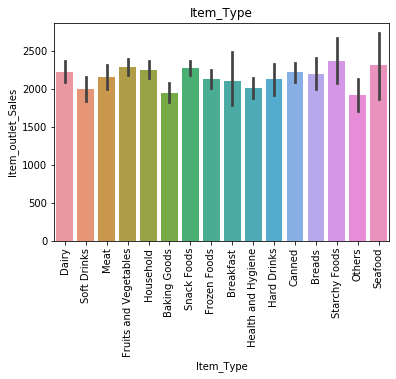

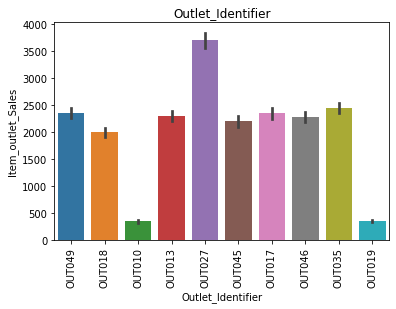

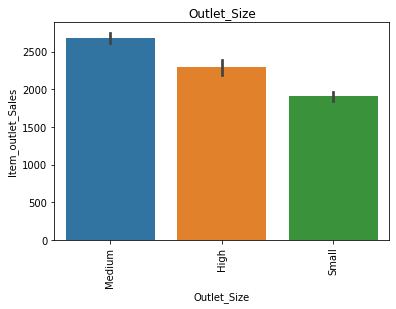

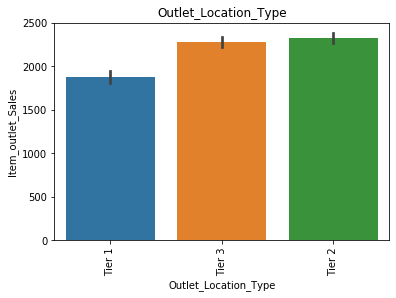

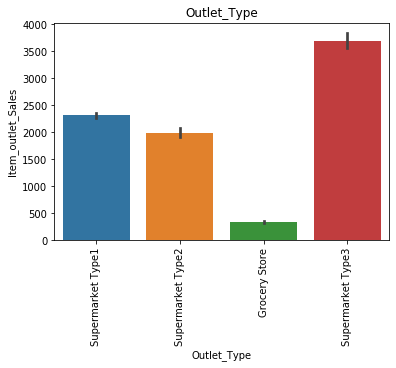

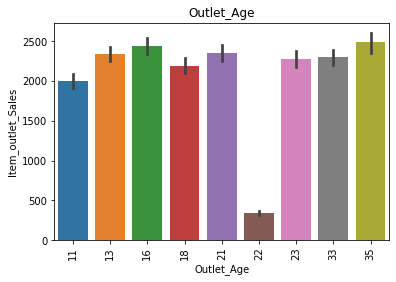

In [17]:
#plotting discrete features against the target variable
for feature in disc_feature:
    sns.barplot(x=feature,y='Item_Outlet_Sales',data=train,estimator=np.mean)
    plt.xlabel(feature)
    plt.ylabel('Item_outlet_Sales')
    plt.title(feature)
    plt.xticks(rotation=90)
    plt.show()

 ###### From the above plots:
1. In Item fat content low fat, LF and Low Fat are same categories, and reg is same as Regular.
2. Outlet identifier OUT027 has abruptly higher average sales value than other outliers.
3. Outlet size is correlated with average outlet sales.
4. Supermaarket type 3 corresponds to highest sales and grocery stores to lowest.


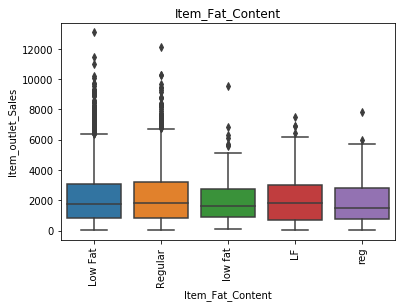

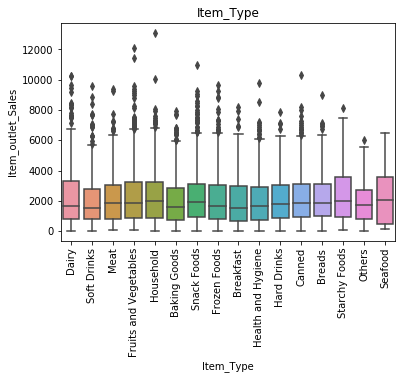

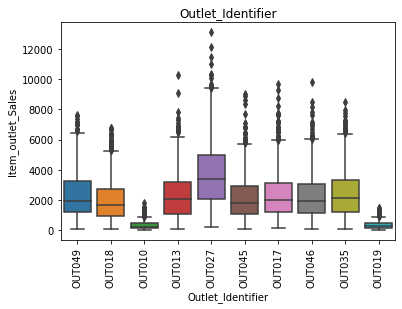

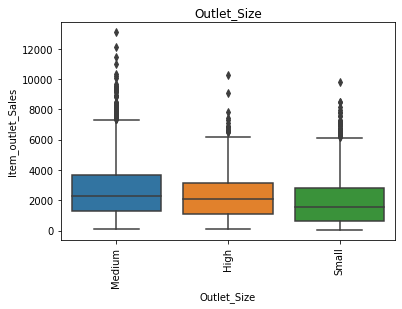

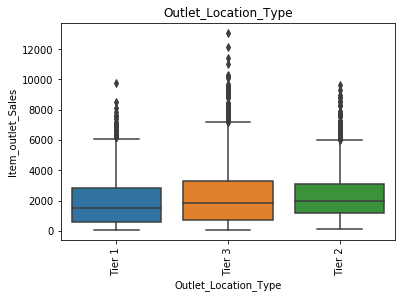

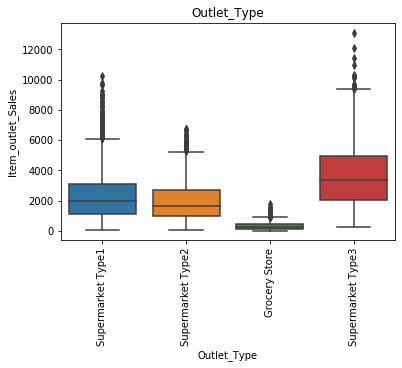

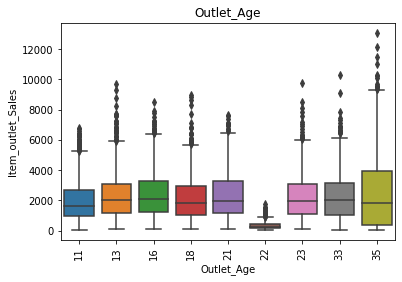

In [18]:
for feature in disc_feature:
    sns.boxplot(x=feature,y='Item_Outlet_Sales',data=train)
    plt.xlabel(feature)
    plt.ylabel('Item_outlet_Sales')
    plt.title(feature)
    plt.xticks(rotation=90)
    plt.show()

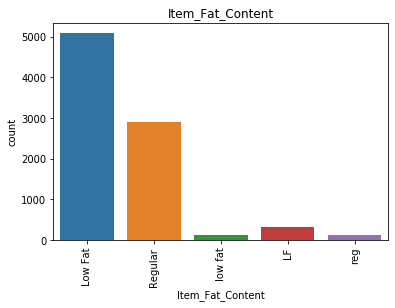

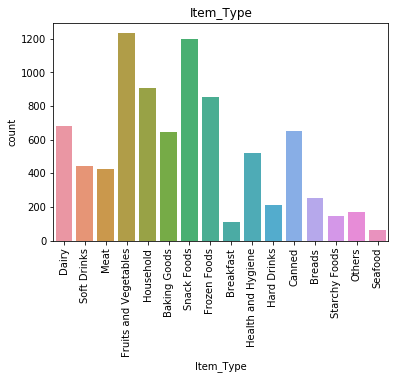

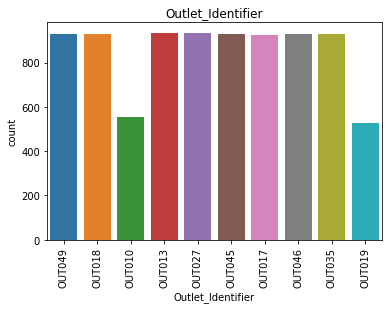

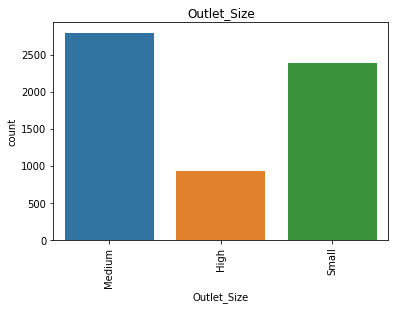

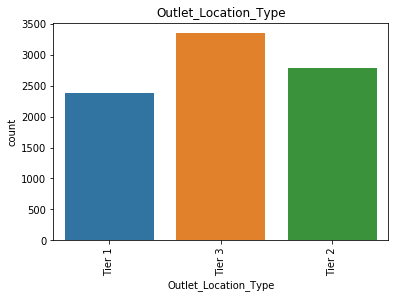

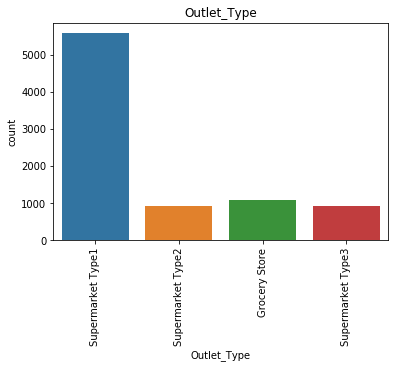

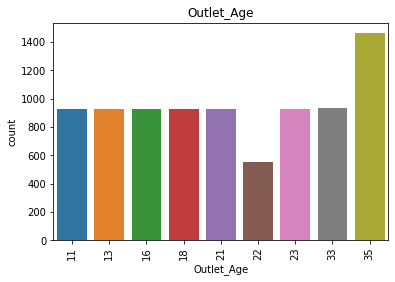

In [19]:
for feature in disc_feature:
    sns.countplot(x=feature,data=train)
    plt.xlabel(feature)
    plt.title(feature)
    plt.xticks(rotation=90)
    plt.show()

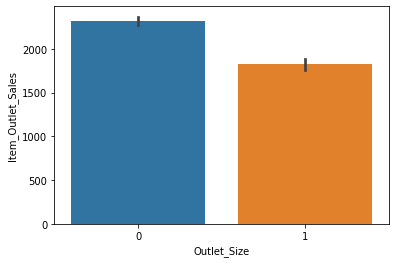

In [20]:
#plotting sales against missing values and available data.
train_copy= train.copy()
train_copy['Outlet_Size']=np.where(train_copy['Outlet_Size'].isnull(),1,0)
sns.barplot(x=train_copy['Outlet_Size'],y=train_copy['Item_Outlet_Sales'],estimator=np.mean)

from the above plot it is evident that mean outlet sales corresponding to null values is lower than non-missing data. Hence, missing values can be assigned a new variable independently.

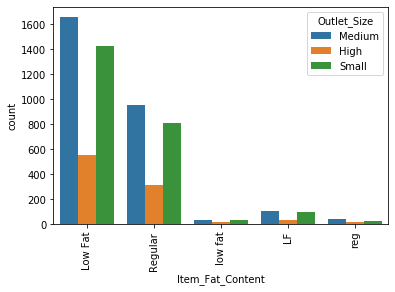

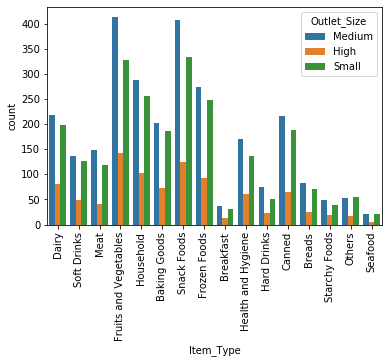

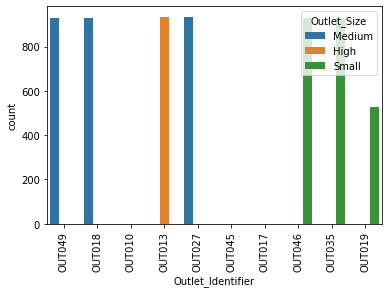

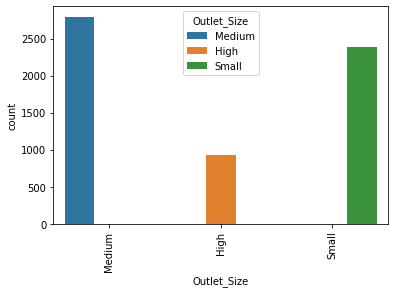

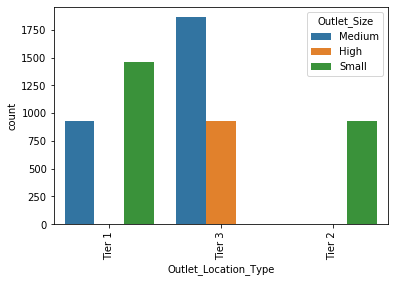

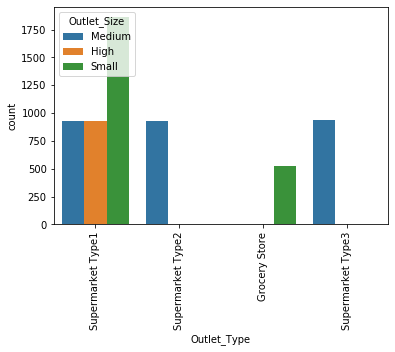

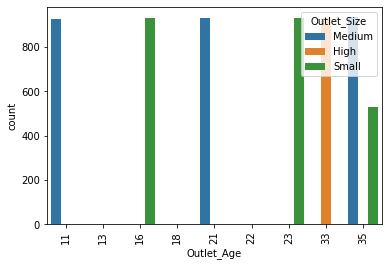

In [21]:
#analysing the features with missing values
for feature in disc_feature:
    sns.countplot(train[feature],hue=train['Outlet_Size'])
    plt.xticks(rotation=90)
    plt.show()


##### From the above plot:
1. Both Low Fat products and Regular fat products are uniformally distributed among different outlet sizes.
2. Every outlet identifier corresponds to a unique outlet size.
3. Tier 2 cities contains only small outlets while in tier one it is small and medium and in tier 3 it is medium and high.
4. Grocery stores are all small while supermarket type2 and type3 are all medium.

In [22]:
train.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                      Supermarket Type1  Medium         930
                                         Small          930
Tier 2                Supermarket Type1  Small          930
Tier 3                Supermarket Type1  High           932
                      Supermarket Type2  Medium         928
                      Supermarket Type3  Medium         935
Name: Outlet_Size, dtype: int64

In [23]:
#checking the train data corresponding to outlet OUT017, OUT010 and OUT045 
train[(train['Outlet_Identifier']=='OUT017')&(train['Outlet_Location_Type']=='Tier 2')]

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
9,FDU28,Regular,0.094450,Frozen Foods,187.8214,OUT017,NaN,Tier 2,Supermarket Type1,4710.5350,13
25,NCD06,Low Fat,0.099887,Household,45.9060,OUT017,NaN,Tier 2,Supermarket Type1,838.9080,13
53,FDA43,Low Fat,0.065042,Fruits and Vegetables,196.3794,OUT017,NaN,Tier 2,Supermarket Type1,3121.2704,13
54,NCP18,Low Fat,0.028760,Household,151.4708,OUT017,NaN,Tier 2,Supermarket Type1,4815.0656,13
73,FDG02,Low Fat,0.011325,Canned,189.6188,OUT017,NaN,Tier 2,Supermarket Type1,2285.0256,13
...,...,...,...,...,...,...,...,...,...,...,...
8493,FDP21,Regular,0.025886,Snack Foods,189.1872,OUT017,NaN,Tier 2,Supermarket Type1,4727.1800,13
8494,NCI54,Low Fat,0.000000,Household,110.4912,OUT017,NaN,Tier 2,Supermarket Type1,1637.8680,13
8496,FDJ57,Regular,0.021696,Seafood,185.3582,OUT017,NaN,Tier 2,Supermarket Type1,3715.1640,13
8500,NCQ42,Low Fat,0.000000,Household,125.1678,OUT017,NaN,Tier 2,Supermarket Type1,1907.5170,13


In [24]:
train[(train['Outlet_Identifier']=='OUT045')&(train['Outlet_Location_Type']=='Tier 2')]['Outlet_Size'].unique()

array([nan], dtype=object)

since tier 2 consists of small outlet size, the missing values for  OUT045 can be replaced with small outlet size.

In [25]:
train[(train['Outlet_Identifier']=='OUT010')&(train['Outlet_Location_Type']=='Tier 3')]['Outlet_Size'].unique()

array([nan], dtype=object)

In [26]:
#listing continuous features for further analysis
cont_feature= [features for features in train.columns if features not in disc_feature]


In [27]:
cont_feature.pop(0)

'Item_Identifier'

In [28]:
train[cont_feature].head()

,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,0.016047,249.8092,3735.1380
1,0.019278,48.2692,443.4228
2,0.016760,141.6180,2097.2700
3,0.000000,182.0950,732.3800
4,0.000000,53.8614,994.7052


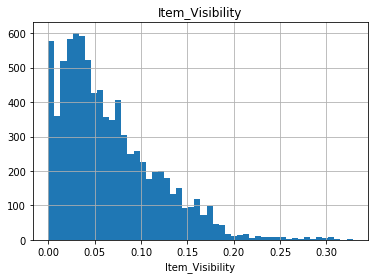

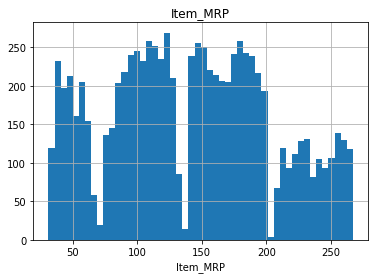

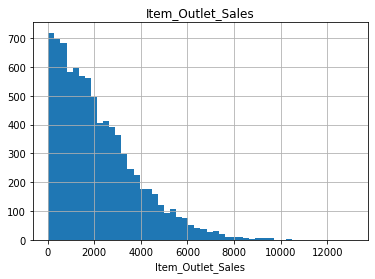

In [29]:
for feature in cont_feature:
    train[feature].hist(bins=50)
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()
   

from the above plot Item_Visibility and Item_Outlet_Sales is right skewed while MRP is uniformally distributed.

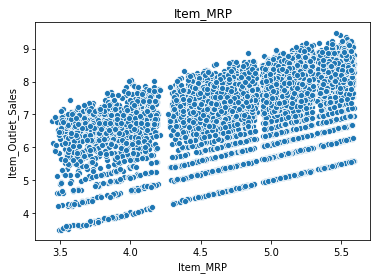

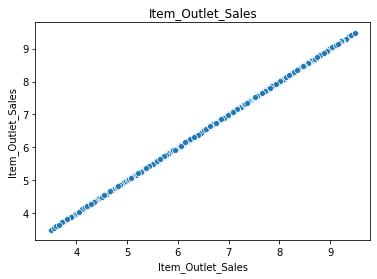

In [30]:
#converting continuous variables into log normal
for features in cont_feature:
    if 0 in train[features].unique():
        pass
    else:
        sns.scatterplot(np.log(train[features]),np.log(train['Item_Outlet_Sales']))
        plt.xlabel(features)
        plt.ylabel('Item_Outlet_Sales')
        plt.title(features)
        plt.show()                
                    

###### Outliers 

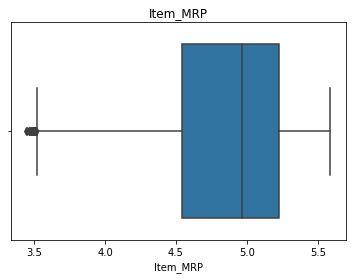

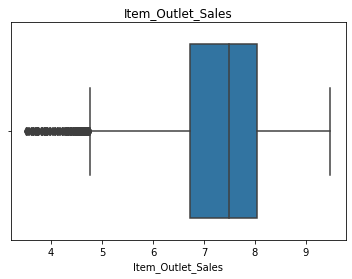

In [31]:
for features in cont_feature:
    if 0 in train[features].unique():
        pass
    else:
        sns.boxplot(np.log(train[features]))
        plt.xlabel(features)
        plt.title(features)
        plt.show()   
    

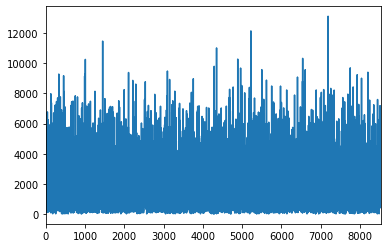

In [32]:
train['Item_Outlet_Sales'].plot(kind='line')

In [33]:
train[train['Item_Outlet_Sales']>11000]

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
1450,FDZ20,Low Fat,0.000000,Fruits and Vegetables,253.0356,OUT027,Medium,Tier 3,Supermarket Type3,11445.1020,35
5223,FDQ19,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,Medium,Tier 3,Supermarket Type3,12117.5600,35
7188,NCE42,Low Fat,0.010551,Household,234.9958,OUT027,Medium,Tier 3,Supermarket Type3,13086.9648,35


index number 1450,5223,7188 are outliers.

In [34]:
train[np.log(train['Item_MRP'])<3.5].shape

(20, 11)

In [35]:
train[np.log(train['Item_MRP'])<3.5].head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
153,DRK12,Low Fat,0.041683,Soft Drinks,31.2900,OUT027,Medium,Tier 3,Supermarket Type3,898.8300,35
210,DRK12,LF,0.041878,Soft Drinks,32.9900,OUT035,Small,Tier 2,Supermarket Type1,133.1600,16
906,DRK12,Low Fat,0.000000,Soft Drinks,32.8900,OUT010,NaN,Tier 3,Grocery Store,33.2900,22
952,FDX59,Low Fat,0.051411,Breads,33.0558,OUT027,Medium,Tier 3,Supermarket Type3,984.7182,35
1209,FDU21,reg,0.076657,Snack Foods,32.3558,OUT013,High,Tier 3,Supermarket Type1,169.7790,33


In [36]:
train[np.log(train['Item_Outlet_Sales'])<5].shape

(269, 11)

In [37]:
train[np.log(train['Item_Outlet_Sales'])<5].head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
29,FDC14,Regular,0.072222,Canned,43.6454,OUT019,Small,Tier 1,Grocery Store,125.8362,35
63,FDY40,Regular,0.150286,Frozen Foods,51.0692,OUT019,Small,Tier 1,Grocery Store,147.8076,35
133,FDS52,Low Fat,0.009163,Frozen Foods,101.7016,OUT010,NaN,Tier 3,Grocery Store,101.2016,22
178,DRY23,Regular,0.191014,Soft Drinks,42.1112,OUT019,Small,Tier 1,Grocery Store,42.6112,35
210,DRK12,LF,0.041878,Soft Drinks,32.9900,OUT035,Small,Tier 2,Supermarket Type1,133.1600,16


### Feature engineering

In [38]:
#missing values substitution
# replcing missing value in categorical feature with a new feature
train['Outlet_Size']=train['Outlet_Size'].fillna('New')

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
Item_Identifier         8523 non-null object
Item_Fat_Content        8523 non-null object
Item_Visibility         8523 non-null float64
Item_Type               8523 non-null object
Item_MRP                8523 non-null float64
Outlet_Identifier       8523 non-null object
Outlet_Size             8523 non-null object
Outlet_Location_Type    8523 non-null object
Outlet_Type             8523 non-null object
Item_Outlet_Sales       8523 non-null float64
Outlet_Age              8523 non-null int64
dtypes: float64(3), int64(1), object(7)
memory usage: 732.6+ KB


In [40]:
#changing categories in fat content
train['Item_Fat_Content']= np.where((train['Item_Fat_Content']=='low fat')|(train['Item_Fat_Content']=='LF')|(train['Item_Fat_Content']=='Low Fat'),'Low Fat','Regular')

In [41]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


#### Outlier Removal

In [42]:
train= train.drop(index=[1450,5223,7188])

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8520 entries, 0 to 8522
Data columns (total 11 columns):
Item_Identifier         8520 non-null object
Item_Fat_Content        8520 non-null object
Item_Visibility         8520 non-null float64
Item_Type               8520 non-null object
Item_MRP                8520 non-null float64
Outlet_Identifier       8520 non-null object
Outlet_Size             8520 non-null object
Outlet_Location_Type    8520 non-null object
Outlet_Type             8520 non-null object
Item_Outlet_Sales       8520 non-null float64
Outlet_Age              8520 non-null int64
dtypes: float64(3), int64(1), object(7)
memory usage: 798.8+ KB


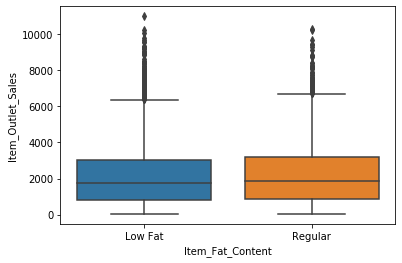

In [44]:
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=train)

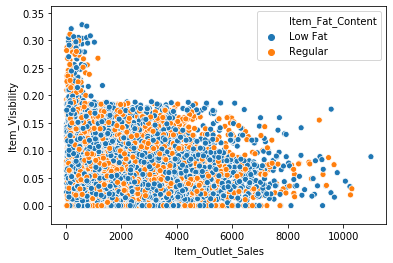

In [45]:
sns.scatterplot(train['Item_Outlet_Sales'],y=train['Item_Visibility'],hue=train['Item_Fat_Content'])


Item fat content has similar distributon for both the categories hence it can be dropped

In [46]:
train=train.drop(['Item_Fat_Content'],axis=1)

In [47]:
#dropping Item identifier column 
train=train.drop(['Item_Identifier'],axis=1)

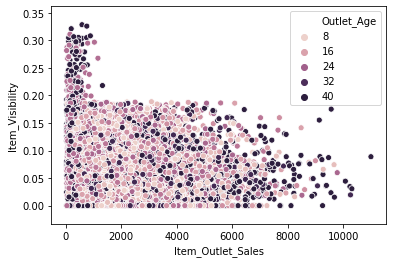

In [48]:
sns.scatterplot(train['Item_Outlet_Sales'],y=train['Item_Visibility'],hue=train['Outlet_Age'])

Outlet age is uniformally distributed against target variable hence this column can also be dropped.

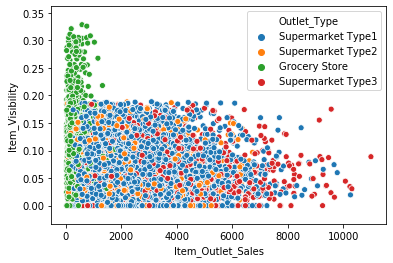

In [49]:
sns.scatterplot(train['Item_Outlet_Sales'],y=train['Item_Visibility'],hue=train['Outlet_Type'])

##### From the above graph:
1. Item outlet sales and outlet type have good correlation.
2. Grocery stores which contains small outlets corresponds to minimum sales and 
3. Supermarket type three which contains medium and large outlets corresponds to maximum outlet sales.


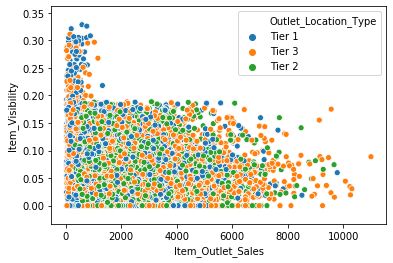

In [50]:
sns.scatterplot(train['Item_Outlet_Sales'],y=train['Item_Visibility'],hue=train['Outlet_Location_Type'])

categories in outlet location is uniformally distributed against outlet sales hence this feature can be dropped.

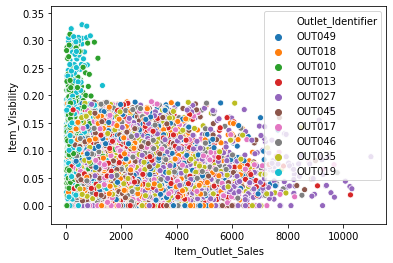

In [51]:
sns.scatterplot(train['Item_Outlet_Sales'],y=train['Item_Visibility'],hue=train['Outlet_Identifier'])

In [52]:
train= train.drop(['Outlet_Location_Type'],axis=1)

In [53]:
train= train.drop(['Item_Visibility'],axis=1)

In [54]:
#creating dummy variables for categorical features
train_dummies= pd.get_dummies(train[['Outlet_Type','Outlet_Size']],drop_first=True)

In [55]:
#adding dummy dataset with other variables in train dataframe
train= pd.concat([train,train_dummies],axis=1)

In [56]:
train.head()

,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size_Medium,Outlet_Size_New,Outlet_Size_Small
0,Dairy,249.8092,OUT049,Medium,Supermarket Type1,3735.1380,21,1,0,0,1,0,0
1,Soft Drinks,48.2692,OUT018,Medium,Supermarket Type2,443.4228,11,0,1,0,1,0,0
2,Meat,141.6180,OUT049,Medium,Supermarket Type1,2097.2700,21,1,0,0,1,0,0
3,Fruits and Vegetables,182.0950,OUT010,New,Grocery Store,732.3800,22,0,0,0,0,1,0
4,Household,53.8614,OUT013,High,Supermarket Type1,994.7052,33,1,0,0,0,0,0


In [57]:
train=train.drop(['Outlet_Type','Outlet_Size','Outlet_Identifier','Item_Type','Outlet_Age'],axis=1)

In [58]:
#Scalling features 

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler=StandardScaler()

In [61]:
scaled_train= scaler.fit_transform(train.drop(['Item_Outlet_Sales'],axis=1))

In [62]:
scaled_train

array([[ 1.74856583,  0.72643174, -0.34961969, ...,  1.43309575,
        -0.62804088, -0.62404526],
       [-1.48889632, -1.37659184,  2.86025077, ...,  1.43309575,
        -0.62804088, -0.62404526],
       [ 0.01062341,  0.72643174, -0.34961969, ...,  1.43309575,
        -0.62804088, -0.62404526],
       ...,
       [-0.89690049,  0.72643174, -0.34961969, ..., -0.69779008,
        -0.62804088,  1.60244788],
       [-0.60758182, -1.37659184,  2.86025077, ...,  1.43309575,
        -0.62804088, -0.62404526],
       [-1.05200117,  0.72643174, -0.34961969, ..., -0.69779008,
        -0.62804088,  1.60244788]])

In [63]:
scaled_col= [feature for feature in train.columns if feature not in ['Item_Outlet_Sales']]

In [64]:
x= pd.DataFrame(data=scaled_train,columns=scaled_col)

In [65]:
x.head()

,Item_MRP,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size_Medium,Outlet_Size_New,Outlet_Size_Small
0,1.748566,0.726432,-0.349620,-0.350465,1.433096,-0.628041,-0.624045
1,-1.488896,-1.376592,2.860251,-0.350465,1.433096,-0.628041,-0.624045
2,0.010623,0.726432,-0.349620,-0.350465,1.433096,-0.628041,-0.624045
3,0.660831,-1.376592,-0.349620,-0.350465,-0.697790,1.592253,-0.624045
4,-1.399065,0.726432,-0.349620,-0.350465,-0.697790,-0.628041,-0.624045


In [66]:
y= pd.DataFrame(train['Item_Outlet_Sales'])

## Predictive Modelling


### Linear regression

In [67]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [68]:

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
print(lm.coef_)
print("------------------------------------------------------------------")
#Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("------------------------------------------------------------------")
train_score=lm.score(X_train,y_train)
test_score= lm.score(X_test,y_test)
print("score for training set is {}".format(train_score))
print("score for test set is {}".format(test_score))

[[ 963.56194205  926.99278371  496.13189319 1014.67282241   12.94352565
   -22.35421036   12.33065188]]
------------------------------------------------------------------
MAE: 839.8118780198039
MSE: 1300472.4347882976
RMSE: 1140.382582639834
------------------------------------------------------------------
score for training set is 0.5637936187385015
score for test set is 0.5598676726662815


### Ridge Regression

In [69]:
rr= Ridge(alpha=1)
rr.fit(X_train,y_train)
predict_ridge= rr.predict(X_test)

In [70]:
print('MAE:', metrics.mean_absolute_error(y_test, predict_ridge))
print('MSE:', metrics.mean_squared_error(y_test, predict_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_ridge)))
train_score=rr.score(X_train,y_train)
test_score= rr.score(X_test,y_test)
print("---------------------------------------")
print("score for training set is {}".format(train_score))
print("score for test set is {}".format(test_score))

MAE: 839.7901296769294
MSE: 1300486.9210607337
RMSE: 1140.388934118853
---------------------------------------
score for training set is 0.5637934960712463
score for test set is 0.5598627699273759


### polynomial Regression 

In [71]:
#applying polynomial regression with degrees 2 and 3 

In [72]:
for i in range(2,4):
    poly = PolynomialFeatures(degree = i) 
    poly_fit= poly.fit_transform(X_train)
    poly.fit(poly_fit,y_train)
    lin2 = LinearRegression() 
    lin2.fit(poly_fit, y_train)
    poly_fit_test= poly.fit_transform(X_test)
    pred_poly= lin2.predict(poly_fit_test)
    print("---------------------------------------------------------------------------------")
    print("score for training set of {} degree polynomial regression is : {} ".format(i,lin2.score(poly_fit, y_train)))
    print("score for test set of {} degree polynomial regression is : {} ".format(i,lin2.score(poly_fit_test,y_test)))
    print("---------------------------------------------------------------------------------")
    print('MAE for {} degree is {}:'.format(i,metrics.mean_absolute_error(y_test, pred_poly)))
    print('MSE for {} degree is {}:'.format(i, metrics.mean_squared_error(y_test, pred_poly)))
    print('RMSE for {} degree is {}:'.format(i,np.sqrt(metrics.mean_squared_error(y_test, pred_poly))))

---------------------------------------------------------------------------------
score for training set of 2 degree polynomial regression is : 0.6047266051020894 
score for test set of 2 degree polynomial regression is : 0.6029961306088999 
---------------------------------------------------------------------------------
MAE for 2 degree is 757.2163536776213:
MSE for 2 degree is 1173039.462415934:
RMSE for 2 degree is 1083.0694633383096:
---------------------------------------------------------------------------------
score for training set of 3 degree polynomial regression is : 0.6062187857686178 
score for test set of 3 degree polynomial regression is : 0.604647872954122 
---------------------------------------------------------------------------------
MAE for 3 degree is 754.428539672331:
MSE for 3 degree is 1168159.0088433768:
RMSE for 3 degree is 1080.8140491515535:
